In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import binom, beta

sns.set(rc = {'figure.figsize':(8,4)})

## Which Prior?

In the avocados problem, we are given data about avocado production during the first year. This gives us a prior probability distribution to asses the following month. In practice, it is common to do some research about the problem, and form your own prior about avocados before considering data from the problem. This notebook will explore other priors we could use for this problem.

We could use this article that sates about 35/81 avocados are thrown out. The question then becomes, how much do we weight this? The article states this was for 2017 so we can start with assuming that rate of 35/81 for one years harvest. If we assume one years harvest for our farm is 14924 avocados, then the prior and our first year of data will have equal weights.

In [21]:
total_avos = 14924 * 1
bad_avos = round(total_avos * (35 / 81))
good_avos = total_avos - bad_avos
print(f"{bad_avos}, {good_avos}")

6449, 8475


In [22]:
# a = bad avocados, b = good avocados
a, b = 6449, 8475
x = np.linspace(beta.ppf(0.0001, a, b), beta.ppf(0.9999, a, b), 100)
y = beta.pdf(x, a, b)

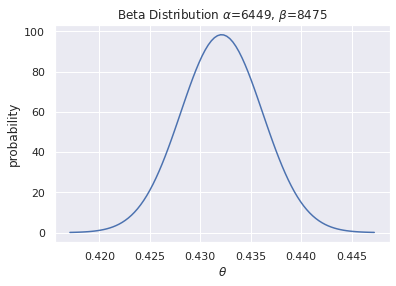

In [23]:
ax = sns.lineplot(x=x, y=y);
ax.set(xlabel=r"$\theta$", ylabel="probability");
ax.set_title(fr"Beta Distribution $\alpha$={a}, $\beta$={b}");

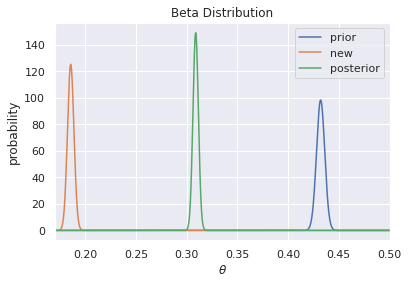

In [24]:
r1 = 0
r2 = 1

res = 10000

# prior
a1, b1 = 6449, 8475
x1 = np.linspace(beta.ppf(r1, a1, b1), beta.ppf(r2, a1, b1), res)
y1 = beta.pdf(x1, a1, b1)

# new observations
a2, b2 = 2773, 12151
x2 = np.linspace(beta.ppf(r1, a2, b2), beta.ppf(r2, a2, b2), res)
y2 = beta.pdf(x2, a2, b2)

# posterior
a3, b3 = a1 + a2, b1 + b2
x3 = np.linspace(beta.ppf(r1, a3, b3), beta.ppf(r2, a3, b3), res)
y3 = beta.pdf(x3, a3, b3)

# plot
fig, ax = plt.subplots()
sns.lineplot(x=x1, y=y1, ax=ax, label="prior");
sns.lineplot(x=x2, y=y2, ax=ax, label="new");
sns.lineplot(x=x3, y=y3, ax=ax, label="posterior");
ax.set(xlim=(0.17, 0.5))
ax.set(xlabel=r"$\theta$", ylabel="probability");
ax.set_title(f"Beta Distribution");